In [2]:
# --- IEEE-CIS Fraud Detection: Train Dataset EDA ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Load Data
train_transaction = pd.read_csv("train_transaction.csv")
train_identity = pd.read_csv("train_identity.csv")

print("train_transaction shape:", train_transaction.shape)
print("train_identity shape:", train_identity.shape)

train_transaction shape: (590540, 394)
train_identity shape: (144233, 41)


In [4]:
# Merge on TransactionID
train = train_transaction.merge(train_identity, on="TransactionID", how="left")
print("Merged train shape:", train.shape)

Merged train shape: (590540, 434)


In [5]:
#Basic Info
print("\n--- Basic Dataset Info ---")
print(train.info())


--- Basic Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB
None


In [6]:
#Missing Values Overview
missing = train.isnull().mean().sort_values(ascending=False)
missing_summary = pd.DataFrame({
    'missing_ratio': missing,
    'dtype': train.dtypes[missing.index]
})
print("\n--- Missing Value Summary (Top 20) ---")
print(missing_summary.head(20))


--- Missing Value Summary (Top 20) ---
       missing_ratio    dtype
id_24       0.991962  float64
id_25       0.991310  float64
id_07       0.991271  float64
id_08       0.991271  float64
id_21       0.991264  float64
id_26       0.991257  float64
id_22       0.991247  float64
id_27       0.991247   object
id_23       0.991247   object
dist2       0.936284  float64
D7          0.934099  float64
id_18       0.923607  float64
D13         0.895093  float64
D14         0.894695  float64
D12         0.890410  float64
id_04       0.887689  float64
id_03       0.887689  float64
D6          0.876068  float64
id_33       0.875895   object
D8          0.873123  float64


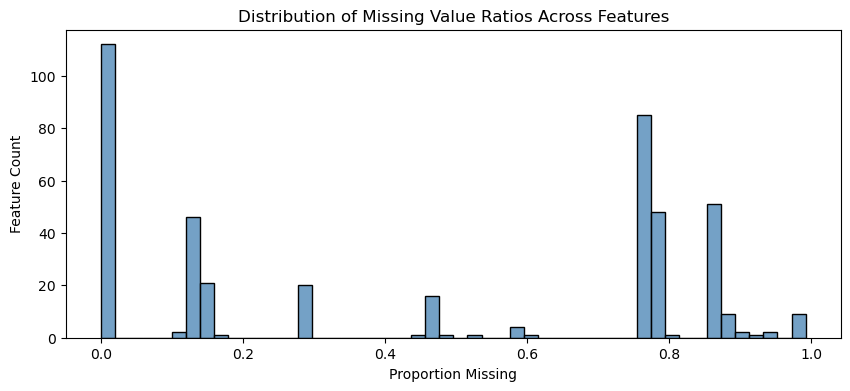

In [7]:
plt.figure(figsize=(10, 4))
sns.histplot(missing, bins=50, color="steelblue")
plt.title("Distribution of Missing Value Ratios Across Features")
plt.xlabel("Proportion Missing")
plt.ylabel("Feature Count")
plt.show()


Fraudulent transactions ratio: 0.0350 (3.50%)


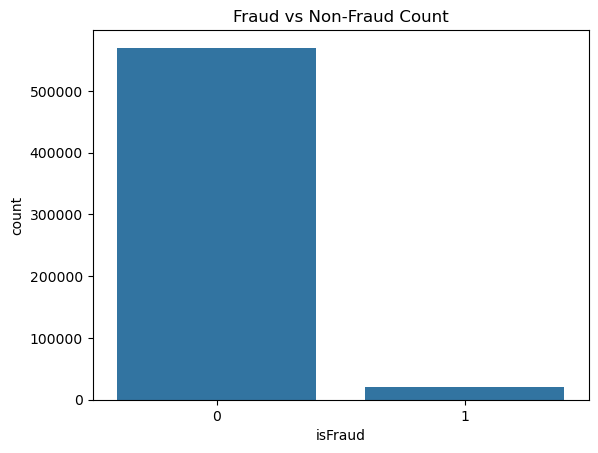

In [8]:
# Target Variable Analysis
if 'isFraud' in train.columns:
    fraud_rate = train['isFraud'].mean()
    print(f"\nFraudulent transactions ratio: {fraud_rate:.4f} ({fraud_rate*100:.2f}%)")

    sns.countplot(x='isFraud', data=train)
    plt.title("Fraud vs Non-Fraud Count")
    plt.show()

In [9]:
# Separate Numeric and Categorical Columns
num_cols = train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = train.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"\nTotal numeric columns: {len(num_cols)}")
print(f"Total categorical columns: {len(cat_cols)}")


Total numeric columns: 403
Total categorical columns: 31


In [10]:
# Numeric Feature Summary
num_summary = train[num_cols].describe().T
num_summary['missing_ratio'] = train[num_cols].isnull().mean()
print("\n--- Numeric Feature Summary (first 10) ---")
print(num_summary.head(10))


--- Numeric Feature Summary (first 10) ---
                   count          mean           std          min  \
TransactionID   590540.0  3.282270e+06  1.704744e+05  2987000.000   
isFraud         590540.0  3.499001e-02  1.837546e-01        0.000   
TransactionDT   590540.0  7.372311e+06  4.617224e+06    86400.000   
TransactionAmt  590540.0  1.350272e+02  2.391625e+02        0.251   
card1           590540.0  9.898735e+03  4.901170e+03     1000.000   
card2           581607.0  3.625555e+02  1.577932e+02      100.000   
card3           588975.0  1.531949e+02  1.133644e+01      100.000   
card5           586281.0  1.992789e+02  4.124445e+01      100.000   
addr1           524834.0  2.907338e+02  1.017411e+02      100.000   
addr2           524834.0  8.680063e+01  2.690623e+00       10.000   

                        25%          50%          75%           max  \
TransactionID   3134634.750  3282269.500   3429904.25  3.577539e+06   
isFraud               0.000        0.000         0.00 

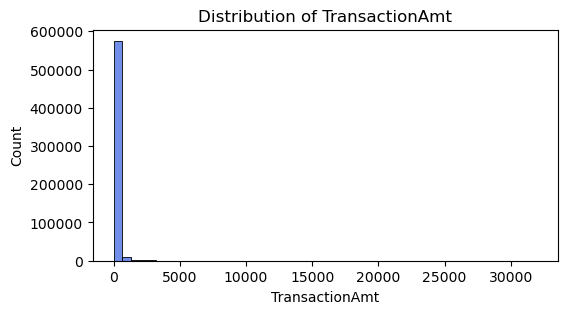

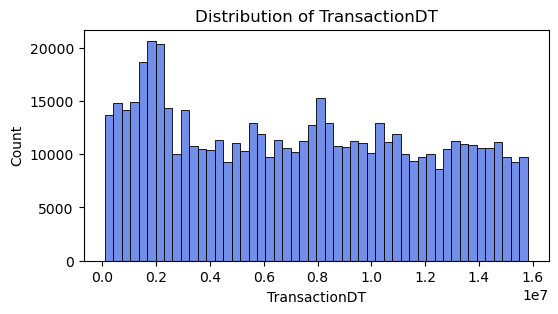

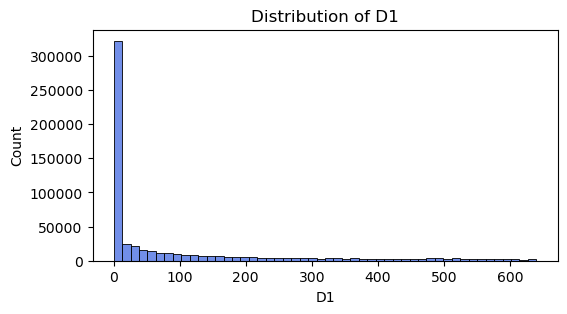

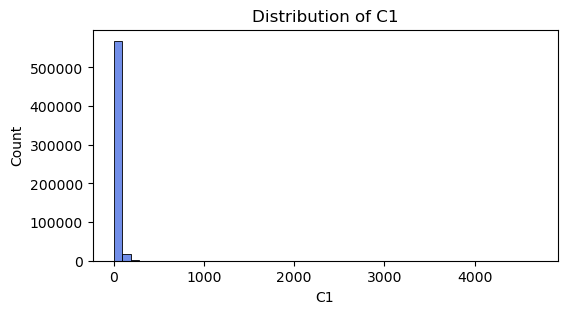

In [11]:
# Plot distribution of a few numeric fields
sample_numeric = ['TransactionAmt', 'TransactionDT', 'D1', 'C1']
for col in [c for c in sample_numeric if c in train.columns]:
    plt.figure(figsize=(6, 3))
    sns.histplot(train[col].dropna(), bins=50, color='royalblue')
    plt.title(f"Distribution of {col}")
    plt.show()

In [12]:
#Categorical Feature Summary
cat_summary = pd.DataFrame({
    "unique_values": [train[c].nunique() for c in cat_cols],
    "missing_ratio": [train[c].isnull().mean() for c in cat_cols]
}, index=cat_cols).sort_values("unique_values", ascending=False)

print("\n--- Categorical Feature Summary (Top 20 by unique count) ---")
print(cat_summary.head(20))


--- Categorical Feature Summary (Top 20 by unique count) ---
               unique_values  missing_ratio
DeviceInfo              1786       0.799055
id_33                    260       0.875895
id_31                    130       0.762451
id_30                     75       0.868654
R_emaildomain             60       0.767516
P_emaildomain             59       0.159949
ProductCD                  5       0.000000
card6                      4       0.002660
card4                      4       0.002670
id_34                      4       0.868248
id_15                      3       0.761261
M4                         3       0.476588
id_23                      3       0.991247
M2                         2       0.459071
M1                         2       0.459071
id_12                      2       0.755761
M9                         2       0.586331
M8                         2       0.586331
M7                         2       0.586353
M6                         2       0.286788


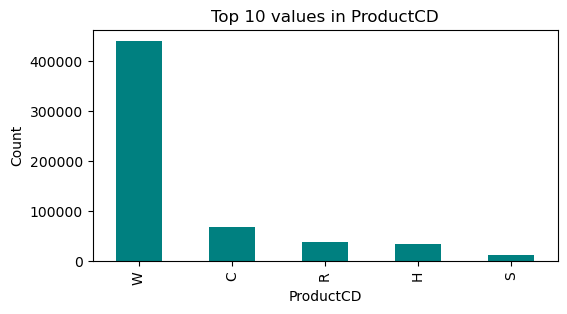

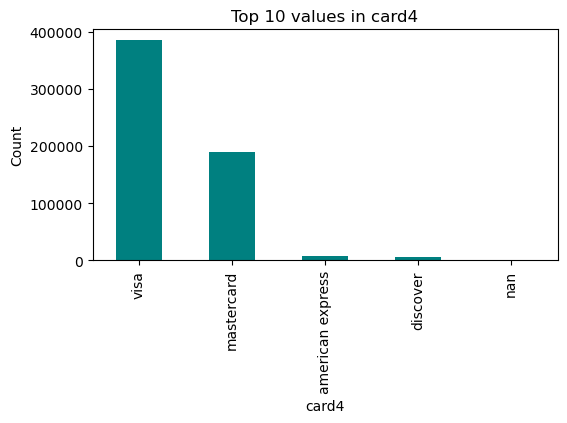

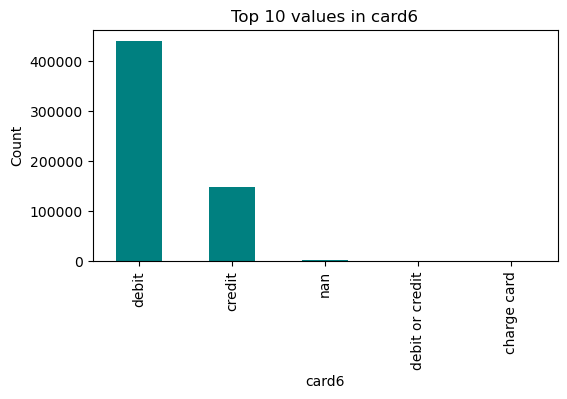

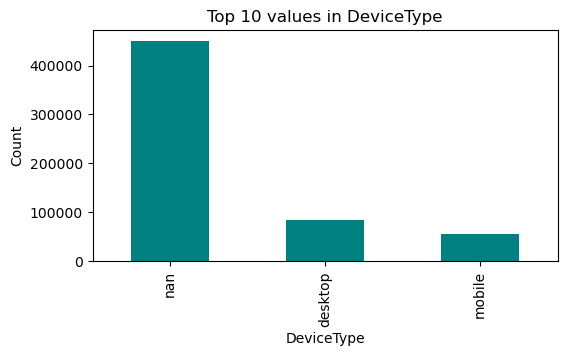

In [13]:
# Plot top few categorical distributions
sample_cat = ['ProductCD', 'card4', 'card6', 'DeviceType']
for col in [c for c in sample_cat if c in train.columns]:
    plt.figure(figsize=(6, 3))
    train[col].value_counts(dropna=False).head(10).plot(kind='bar', color='teal')
    plt.title(f"Top 10 values in {col}")
    plt.ylabel("Count")
    plt.show()

In [ ]:
# Correlation Analysis (for numeric features)
corr_features = train[num_cols].corr()['isFraud'].sort_values(ascending=False)
print("\nTop 10 features correlated with isFraud:")
print(corr_features.head(10))

plt.figure(figsize=(8, 4))
sns.barplot(x=corr_features.head(10), y=corr_features.head(10).index, color='tomato')
plt.title("Top 10 Correlated Numeric Features with isFraud")
plt.xlabel("Correlation Coefficient")
plt.show()

In [ ]:
# Range & Uniqueness Overview
range_summary = pd.DataFrame({
    "min": train[num_cols].min(),
    "max": train[num_cols].max(),
    "mean": train[num_cols].mean(),
    "std": train[num_cols].std(),
    "n_unique": [train[c].nunique() for c in num_cols]
})
print("\n--- Range and Uniqueness Summary (sample 10) ---")
print(range_summary.head(10))

In [ ]:
# Identity Information Check
id_cols = [c for c in train_identity.columns if c != "TransactionID"]
id_missing = train[id_cols].isnull().mean().mean() * 100
print(f"\nAverage missingness in identity fields: {id_missing:.2f}%")

In [ ]:
# Save Summary Outputs
missing_summary.to_csv("missing_summary.csv", index=True)
num_summary.to_csv("numeric_summary.csv", index=True)
cat_summary.to_csv("categorical_summary.csv", index=True)